In [1]:
# cifar10
import tensorflow as tf
from tensorflow import keras
import numpy as np

(color_train, _), (color_test, _) = keras.datasets.cifar10.load_data()
print(color_train.shape)
print(color_test.shape)

(50000, 32, 32, 3)
(10000, 32, 32, 3)


In [2]:
def rgb2gray(rgb):
    return np.dot(rgb[...,:3], [0.2989, 0.5870, 0.1140])

In [3]:
gray_train = rgb2gray(color_train)
gray_test  = rgb2gray(color_test)

print(gray_train.shape)
print(gray_test.shape)

(50000, 32, 32)
(10000, 32, 32)


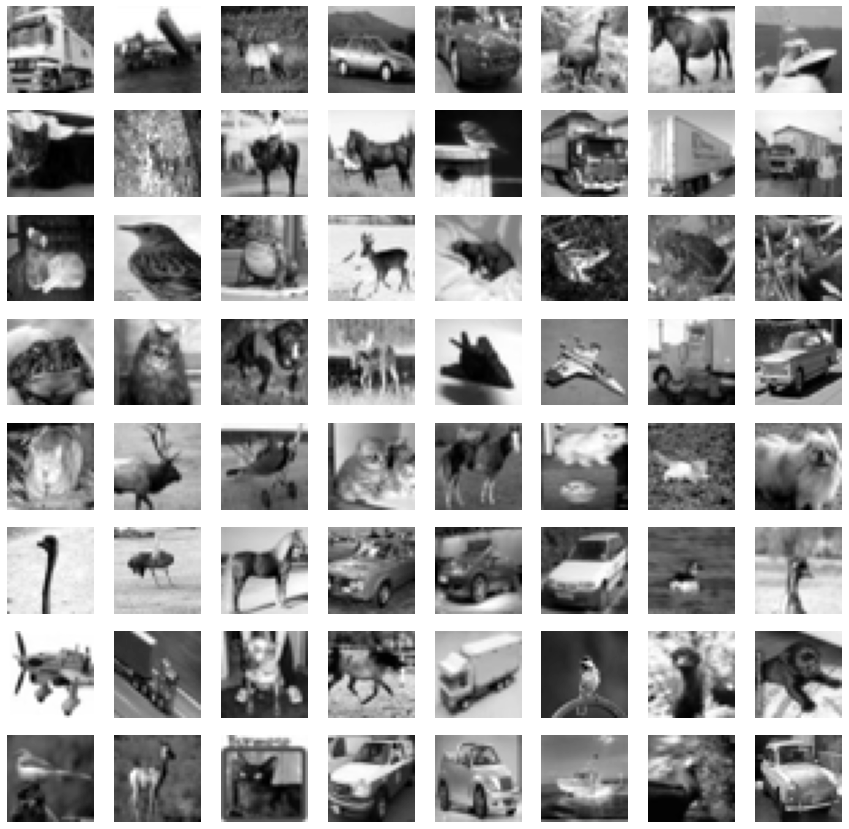

In [9]:
# dùng vẽ đồ thị, hình ảnh
import matplotlib.pyplot as plt 
import numpy as np  

# Tạo dang sách 9 phần tử ngẫu nhiên từ m_train có 50000 phần tử
indices = list(np.random.randint(10000, size=64))

fig =plt.figure(figsize=(15,15))
columns = 8
rows = 8
for i in range(1, columns*rows +1):
    img = gray_train[i]
    fig.add_subplot(rows, columns, i)
    
    plt.axis('off')
    plt.imshow(img, cmap='gray')

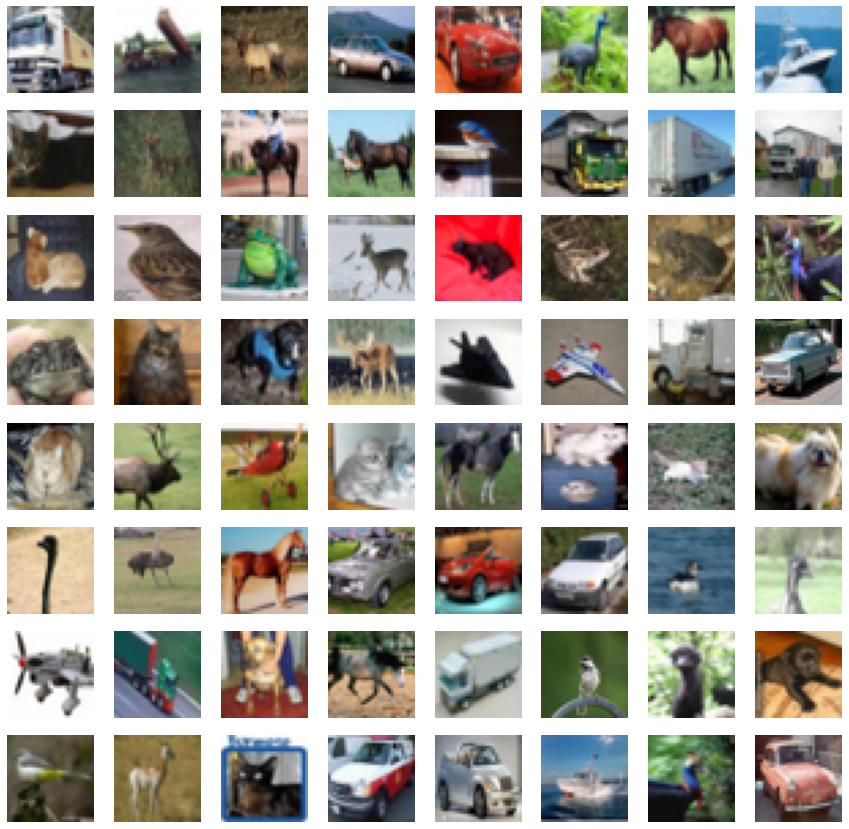

In [10]:
fig =plt.figure(figsize=(15,15))
columns = 8
rows = 8
for i in range(1, columns*rows +1):
    img = color_train[i]
    fig.add_subplot(rows, columns, i)
    
    plt.axis('off')
    plt.imshow(img)

In [11]:
# normalize

gray_train = gray_train / 255.0
gray_test  = gray_test / 255.0
color_train = color_train / 255.0
color_test  = color_test / 255.0

gray_train = gray_train.reshape(50000, 32, 32, 1)
gray_test  = gray_test.reshape(10000, 32, 32, 1)

print(gray_train.shape)
print(gray_test.shape)

(50000, 32, 32, 1)
(10000, 32, 32, 1)


In [12]:
# model
model = keras.models.Sequential()
model.add(tf.keras.Input(shape=(32,32,1)))

model.add(keras.layers.Conv2D(filters=32, 
                              kernel_size=3,
                              padding='same'))
model.add(tf.keras.layers.LeakyReLU())

model.add(keras.layers.Conv2D(filters=64, 
                              kernel_size=3,
                              padding='same'))
model.add(tf.keras.layers.LeakyReLU())

model.add(keras.layers.Conv2D(filters=128, 
                              kernel_size=3,
                              padding='same'))
model.add(tf.keras.layers.LeakyReLU())

model.add(keras.layers.Conv2D(filters=64, 
                              kernel_size=3,
                              padding='same'))
model.add(tf.keras.layers.LeakyReLU())

model.add(keras.layers.Conv2D(filters=3, 
                              kernel_size=1, 
                              activation='sigmoid',
                              padding='same'))

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_5 (Conv2D)           (None, 32, 32, 32)        320       
                                                                 
 leaky_re_lu_4 (LeakyReLU)   (None, 32, 32, 32)        0         
                                                                 
 conv2d_6 (Conv2D)           (None, 32, 32, 64)        18496     
                                                                 
 leaky_re_lu_5 (LeakyReLU)   (None, 32, 32, 64)        0         
                                                                 
 conv2d_7 (Conv2D)           (None, 32, 32, 128)       73856     
                                                                 
 leaky_re_lu_6 (LeakyReLU)   (None, 32, 32, 128)       0         
                                                                 
 conv2d_8 (Conv2D)           (None, 32, 32, 64)       

In [19]:
# train
optimizer = tf.keras.optimizers.Adam(0.00001)
model.compile(optimizer=optimizer,
              loss=tf.keras.losses.MeanAbsoluteError(),
              metrics=['mean_absolute_error'])
history_data = model.fit(gray_train, color_train,
                         batch_size=256, epochs=30)

Epoch 1/30
196/196 [==============================] - 6s 28ms/step - loss: 0.0478 - mean_absolute_error: 0.0478
Epoch 2/30
196/196 [==============================] - 6s 28ms/step - loss: 0.0478 - mean_absolute_error: 0.0478
Epoch 3/30
196/196 [==============================] - 6s 28ms/step - loss: 0.0478 - mean_absolute_error: 0.0478
Epoch 4/30
196/196 [==============================] - 6s 28ms/step - loss: 0.0478 - mean_absolute_error: 0.0478
Epoch 5/30
196/196 [==============================] - 6s 28ms/step - loss: 0.0478 - mean_absolute_error: 0.0478
Epoch 6/30
196/196 [==============================] - 6s 28ms/step - loss: 0.0478 - mean_absolute_error: 0.0478
Epoch 7/30
196/196 [==============================] - 6s 28ms/step - loss: 0.0478 - mean_absolute_error: 0.0478
Epoch 8/30
196/196 [==============================] - 6s 28ms/step - loss: 0.0478 - mean_absolute_error: 0.0478
Epoch 9/30
196/196 [==============================] - 6s 29ms/step - loss: 0.0478 - mean_absolute_error:

In [ ]:
# 0.0480

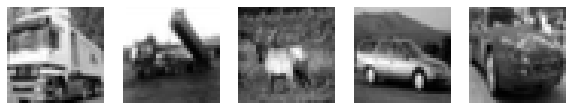

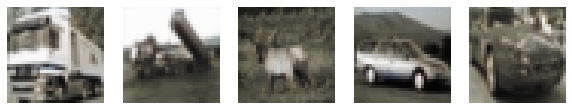

In [20]:

color_predicted = model.predict(gray_train)

columns = 5
rows = 1

fig = plt.figure(figsize=(10,5))  
for i in range(1, columns*rows +1):
    img = gray_train[i].reshape(32,32,1)
    fig.add_subplot(rows, columns, i)

    plt.axis('off')
    plt.imshow(img, cmap='gray')

fig = plt.figure(figsize=(10,5))  
for i in range(1, columns*rows +1):
    img = color_predicted[i].reshape(32,32,3)
    fig.add_subplot(rows, columns, i)

    plt.axis('off')
    plt.imshow(img)
